# AIDI1003- Machine Learning Programming Final Project

#### Group Members: Amanpreet Kaur, Gurleen Kaur, Pardeep Kaur

## Loading the Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, cross_val_score

# Load dataset
df = pd.read_csv("Mall_Customers.csv")  
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Cleaning

##### Tasks:
##### Handle missing values
##### Remove Duplicates
##### Check Outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
Duplicates: 0


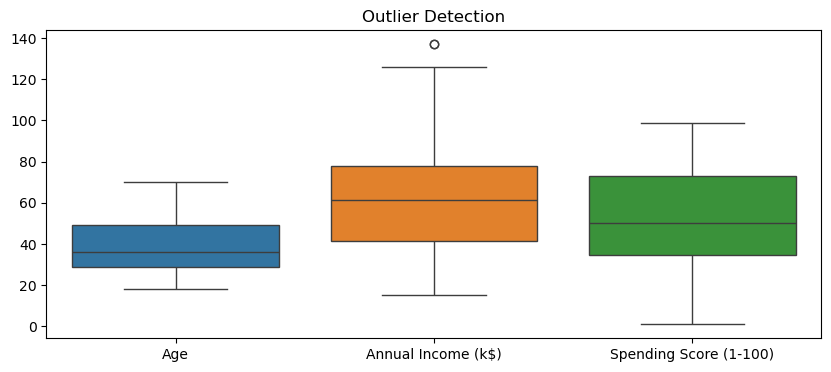

In [4]:
# Show dataset info
df.info()

# Missing values
print("Missing values:\n", df.isnull().sum())

# Duplicates
print("Duplicates:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Outlier detection plot
plt.figure(figsize=(10, 4))
sns.boxplot(data=df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.title("Outlier Detection")
plt.show()


## Data Preprocessing

##### Tasks:
##### Encode Categorical Features
##### Normalize/Standardize numeric features


In [5]:
# Encode 'Gender' (Female = 0, Male = 1)
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Select features for clustering
features = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


## Exploratory Data Analysis (EDA)

##### Tasks:
##### Summary Stats
##### Visualizations

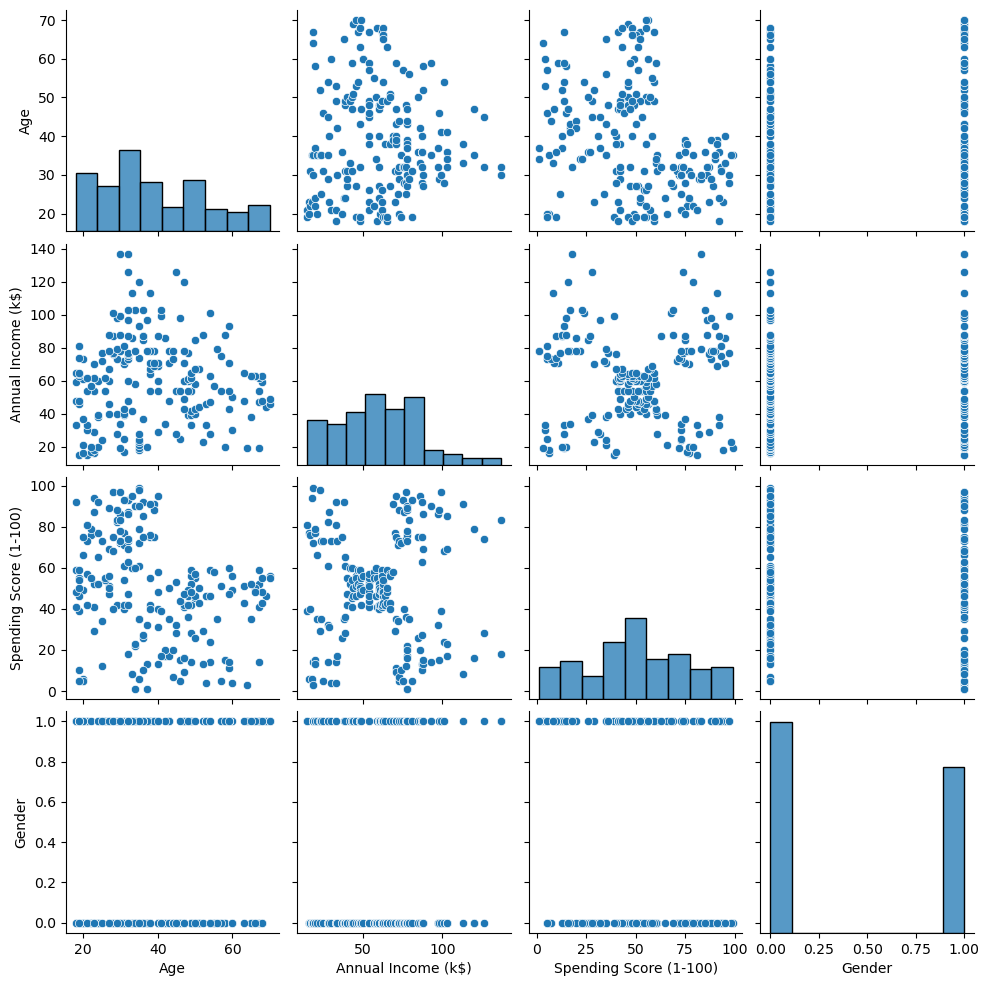

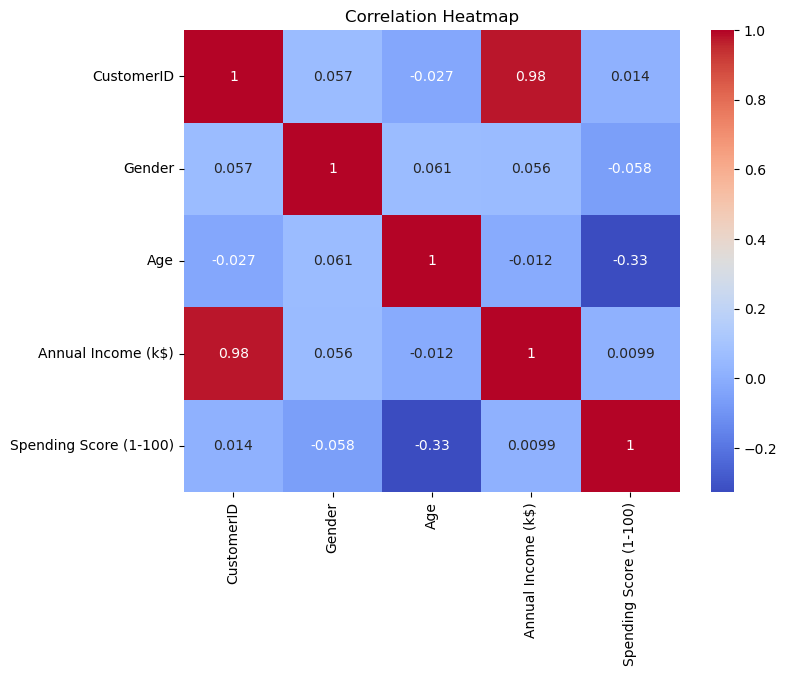

In [8]:
# Summary stats
df.describe()

# Pairplot for relationships
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']])
plt.show()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Model Selection and Building

Since this is customer segmentation, so going to use KMeans Clustering.

In [9]:
import os
os.environ["OMP_NUM_THREADS"] = "1"


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

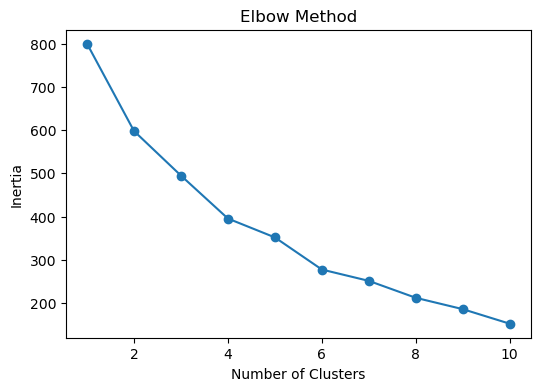

In [12]:
# Elbow method to find optimal k
inr = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(features_scaled )
    inr.append(km.inertia_)

# Plot elbow
plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), inr, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


##### After finding optimal k (e.g., 5), build model:

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


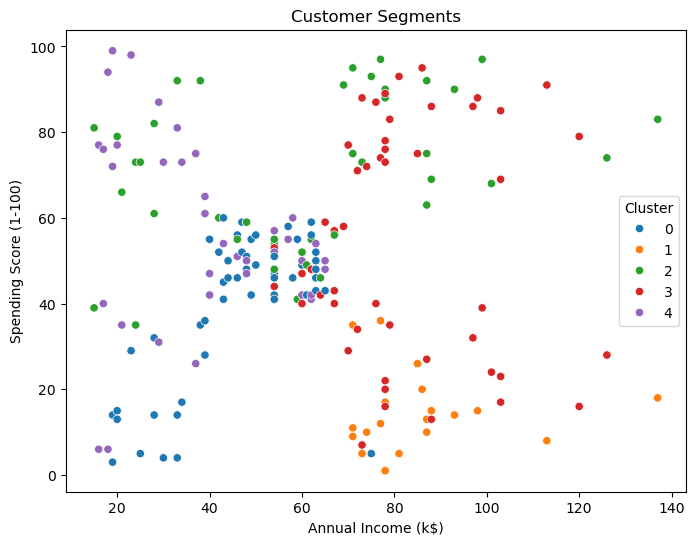

In [14]:
# Let's say optimal k = 5
km = KMeans(n_clusters=5, random_state=42)
cl_lbl = km.fit_predict(features_scaled)

# Add cluster labels to DataFrame
df['Cluster'] = cl_lbl

# Visualize clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.title("Customer Segments")
plt.show()


## Hypermeter Tuning 

In clustering, tuning is limited -- the elbow method & silhouette score help.

In [15]:
# Silhouette Score to validate number of clusters
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    lbl = km.fit_predict(features_scaled)
    scr = silhouette_score(features_scaled, lbl)
    print(f"Silhouette Score for {k} clusters: {scr:.3f}")


Silhouette Score for 2 clusters: 0.278
Silhouette Score for 3 clusters: 0.258
Silhouette Score for 4 clusters: 0.290
Silhouette Score for 5 clusters: 0.272
Silhouette Score for 6 clusters: 0.335
Silhouette Score for 7 clusters: 0.346
Silhouette Score for 8 clusters: 0.373
Silhouette Score for 9 clusters: 0.388


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

## Model Evaluation and Validation

For clustering (unsupervised), evaluation is based on:

Silhoutte Score

Cluster interpretability

There is no need of cross-validation like supervised models, but we can still analyze distributions.

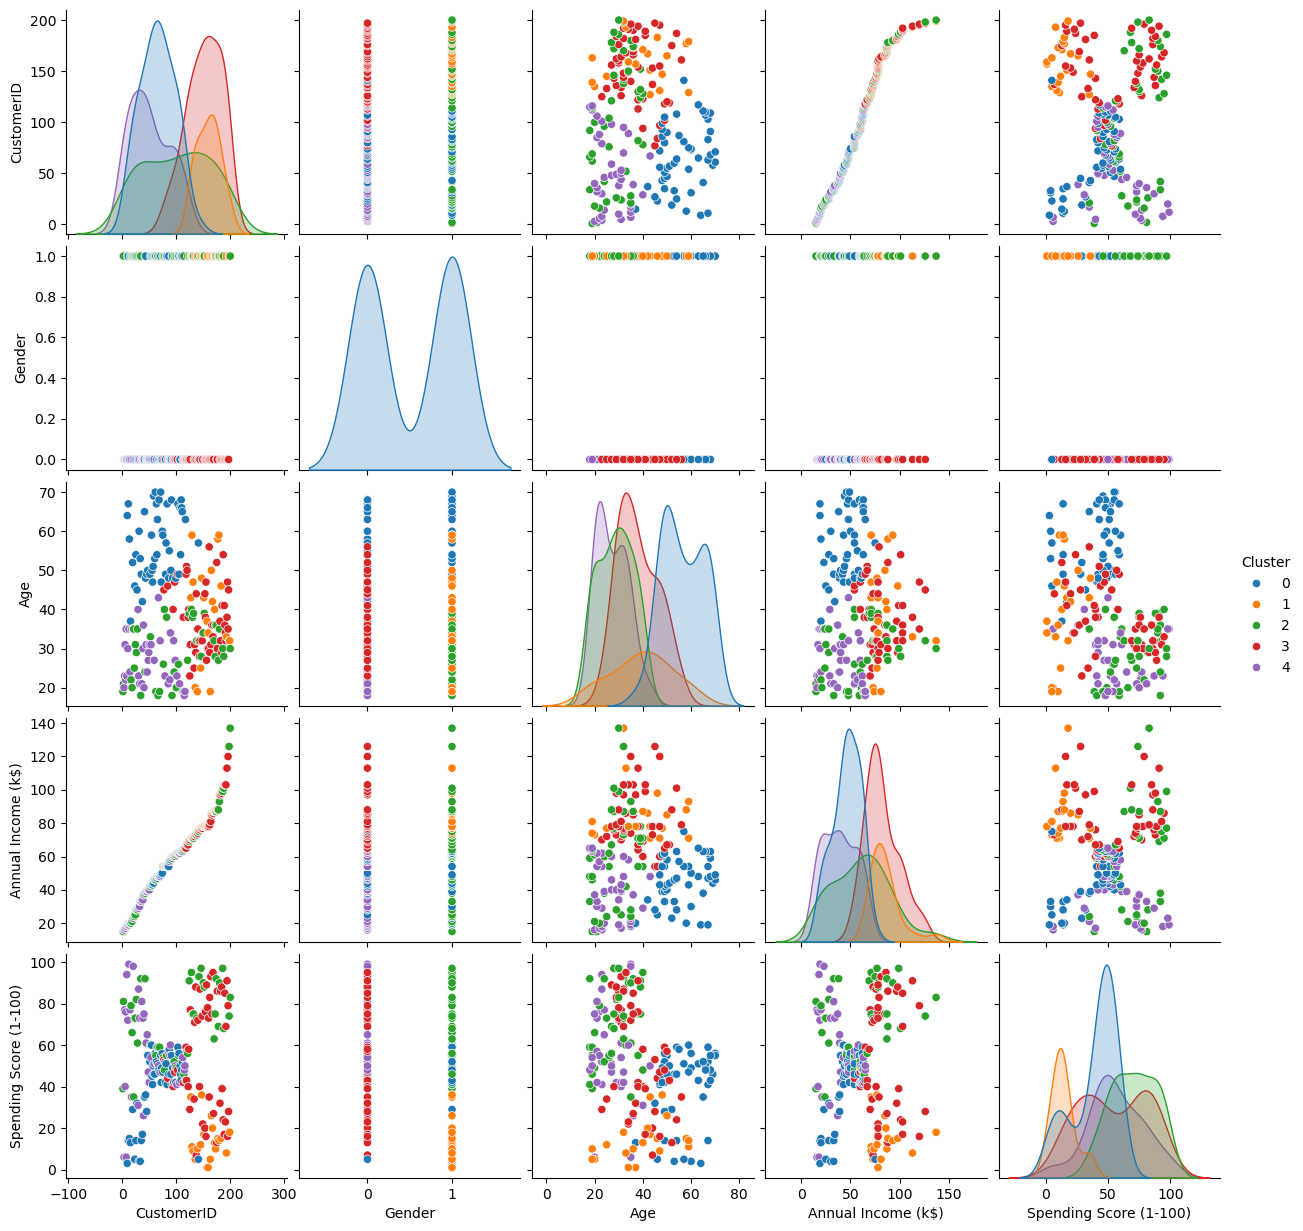

In [16]:
import warnings
warnings.filterwarnings('ignore')

# Analyze clusters
df.groupby('Cluster').mean()

# Visualize with pairplot
sns.pairplot(df, hue='Cluster', palette='tab10')
plt.show()


In [21]:
import joblib

# Save model and scaler
joblib.dump(km, 'km_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model and scaler saved successfully.")

Model and scaler saved successfully.
